In [0]:
#Importing Libraries

import os
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.utils

import seaborn as sns

In [0]:
def load_data(filename):
    """
    To load Mining Pool address data from csv file
    
    Input:
    filename -> A string that represents where the datafile can be located
    
    Output:
    data -> Dataframe of Mining Pool address data
    """
    
    #Load the data
    data = pd.read_csv(filename)
    
    return data

In [0]:
# Loading data
# data files for is_miner=True and is_miner=False are extracted from google big query
# more details in document file

data_true = load_data("mining_pool_data_true.csv")  # is_miner = true
data_false = load_data("mining_pool_data_false.csv") # is_miner = false

print(data_true.shape)
print(data_false.shape)

(10011, 30)
(16000, 32)


In [0]:
data_true.head()

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,total_tx_output_value,mean_tx_output_value,stddev_tx_output_value,total_output_tx,mean_monthly_output_value,mean_monthly_output_count,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,stddev_output_idle_time,mean_input_idle_time,stddev_input_idle_time
0,True,1NSc4MCWVzXeCwK7htgb84mMaZdJvT9vAG,1409529600,1430438400,1472688000,1472688000,20908800,0,-42249600,-63158400,8,47,395272875,8.410061e+06,4.018210e+06,47,8.410061e+06,1,1,47,395272875,8.410061e+06,4.018210e+06,14,8.410061e+06,1,4.740940e+05,9.239066e+05,6.234192e+04,6.689141e+04
1,True,1A48fAiJQuMX8kBbECDouQKvi1VgzeFo8d,1391212800,1462060800,1462060800,1509494400,70848000,47433600,-47433600,-70848000,9,45,208860728,4.641350e+06,1.687345e+06,45,4.641350e+06,1,2,45,208860728,4.641350e+06,1.687345e+06,2,4.641350e+06,1,1.615658e+06,8.065896e+06,4.760591e+07,NaN
2,True,1EjBFLXPMgSw4GhuEAusopsvZF2Zk8xezQ,1335830400,1351728000,1335830400,1351728000,15897600,15897600,0,0,4,30,2561941332,8.539804e+07,3.386015e+07,30,8.539804e+07,1,3,30,2561941332,8.539804e+07,3.386015e+07,8,8.539804e+07,1,5.504435e+05,1.799680e+06,2.396129e+06,4.859269e+06
3,True,1JMdZkM9SEgWccjh4kB3o1RZpJCWf2fbNk,1398902400,1509494400,1448928000,1514764800,110592000,65836800,-5270400,-50025600,31,210,1382064389,6.581259e+06,1.047163e+07,210,6.581259e+06,1,3,210,1382064389,6.581259e+06,1.047163e+07,28,6.581259e+06,1,5.400082e+05,2.036205e+06,6.117557e+06,1.358468e+07
4,True,1HKz4eCZJnNbZzCU4GmjRTcTJFQPHtdgmv,1385856000,1388534400,1493596800,1493596800,2678400,0,-105062400,-107740800,2,42,1043998117,2.485710e+07,1.287879e+07,42,2.485710e+07,1,1,42,1043998117,2.485710e+07,1.287879e+07,4,2.485710e+07,1,8.122259e+04,9.339703e+04,9.996500e+03,9.929901e+03


In [0]:
data_false.head()

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,total_tx_output_value,mean_tx_output_value,stddev_tx_output_value,total_output_tx,mean_monthly_output_value,mean_monthly_output_count,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,stddev_output_idle_time,mean_input_idle_time,stddev_input_idle_time,Unnamed: 30,Unnamed: 31
0,False,1F1xFDvNSZKq14BKKF6iKojMVCUsPJTm8d,1456790400,1480550400,1459468800,1483228800,23760000,23760000,-2678400,-2678400,10,138,6142615,4.451170e+04,4.430391e+04,138,4.451170e+04,1,7,138,6142615,4.451170e+04,4.430391e+04,31,4.451170e+04,1,172171.370370,238441.230154,8.297950e+05,1.641219e+06,NaN,NaN
1,False,18ReoLfke7AL3Eh5r65KY3vVwzSKjvYiiE,1472688000,1480550400,1472688000,1480550400,7862400,7862400,0,0,3,32,378270662,1.182096e+07,2.067329e+07,32,1.182096e+07,1,3,31,378258958,1.220190e+07,2.090054e+07,22,1.220190e+07,1,370954.416667,829732.008834,5.909967e+05,1.010440e+06,NaN,NaN
2,False,3BMEXFTSHv4DwAMJDvUXrmLHwA6LdFve6S,1556668800,1561939200,1556668800,1564617600,5270400,7948800,-2678400,0,3,22,268985555,1.222662e+07,1.197977e+07,22,1.222662e+07,1,3,22,268985555,1.222662e+07,1.197977e+07,9,1.222662e+07,1,234490.619048,347080.949806,8.887940e+05,1.323209e+06,NaN,NaN
3,False,19YTkYe4EV61GZH1RhxqExAuEuRkbcFXNL,1446336000,1459468800,1446336000,1459468800,13132800,13132800,0,0,5,68,31381854953,4.614979e+08,6.923569e+08,68,4.614979e+08,1,5,68,31381854953,4.614979e+08,6.923569e+08,68,4.614979e+08,1,188217.969697,560957.854159,1.854033e+05,5.143332e+05,NaN,NaN
4,False,3BMEXhjfoc6wpfG3VtFpWnhoZD3zwdDWc6,1525132800,1527811200,1525132800,1538352000,2678400,13219200,-10540800,0,2,19,5955329668,3.134384e+08,4.019347e+08,19,3.134384e+08,1,3,19,5955329668,3.134384e+08,4.019347e+08,5,3.134384e+08,1,205070.888889,365665.379837,2.850740e+06,3.798701e+06,NaN,NaN


In [0]:
# combining both data_true and data_false and shuffle the resultant data

frames = [data_true, data_false]
data = pd.concat(frames, join='inner', ignore_index = True)

data = sklearn.utils.shuffle(data)

In [0]:
#Store combined data
data.to_csv('mining_data_final.csv') 

In [0]:
# Analysis of data
#Exploratory data analysis
data.head()

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,total_tx_output_value,mean_tx_output_value,stddev_tx_output_value,total_output_tx,mean_monthly_output_value,mean_monthly_output_count,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,stddev_output_idle_time,mean_input_idle_time,stddev_input_idle_time
22399,False,3NEBBBNd7eDakZd6EkjaUbcmuenJKsoks5,1467331200,1561939200,1467331200,1561939200,94608000,94608000,0,0,12,109,2971786673,2.726410e+07,2.802060e+07,109,2.726410e+07,1,12,109,2971786673,2.726410e+07,2.802060e+07,109,2.726410e+07,1,998182.336842,4.893928e+06,1.009244e+06,4.913021e+06
25887,False,1JGcyABAfmh4HMvZDTduXQBfL3gMUDNoQC,1548979200,1548979200,1548979200,1548979200,0,0,0,0,1,57,33089912,5.805248e+05,5.648978e+03,57,5.805248e+05,1,1,57,33089912,5.805248e+05,5.648978e+03,57,5.805248e+05,1,1114.900000,1.146490e+03,1.216667e+03,1.167148e+03
3839,True,1ChANGeATMH8dFnj39wGTjfjudUtLspzXr,1385856000,1483228800,1385856000,1483228800,97372800,97372800,0,0,36,2817,952806440030,3.382344e+08,7.990187e+08,2817,3.382344e+08,1,35,2817,952806440030,3.382344e+08,7.990187e+08,146,3.382344e+08,1,34654.362571,1.519314e+05,7.198030e+05,1.065551e+06
20691,False,1QKWmT45U7Ze8HQb32ANE21QG2zvd76hDQ,1530403200,1564617600,1533081600,1564617600,34214400,31536000,0,-2678400,10,80,1352406,1.690508e+04,9.836046e+04,80,1.690508e+04,1,4,79,1351291,1.710495e+04,9.897262e+04,5,1.710495e+04,1,411408.628205,1.276966e+06,7.513766e+06,5.377653e+06
11912,False,39ZG8TSnHjHF6uXjJPzRMswqXnwncvDReb,1561939200,1564617600,1561939200,1564617600,2678400,2678400,0,0,2,19,2444170,1.286405e+05,5.319196e+04,19,1.286405e+05,1,2,19,2444170,1.286405e+05,5.319196e+04,19,1.286405e+05,1,126145.222222,1.203745e+05,1.284962e+05,1.244832e+05


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26011 entries, 22399 to 7427
Data columns (total 30 columns):
is_miner                     26011 non-null bool
address                      26011 non-null object
output_month_min             26011 non-null int64
output_month_max             26011 non-null int64
input_month_min              26011 non-null int64
input_month_max              26011 non-null int64
output_active_time           26011 non-null int64
input_active_time            26011 non-null int64
io_max_lag                   26011 non-null int64
io_min_lag                   26011 non-null int64
output_active_months         26011 non-null int64
total_tx_output_count        26011 non-null int64
total_tx_output_value        26011 non-null int64
mean_tx_output_value         26011 non-null float64
stddev_tx_output_value       26011 non-null float64
total_output_tx              26011 non-null int64
mean_monthly_output_value    26011 non-null float64
mean_monthly_output_count    260

In [0]:
data.describe()

,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,total_tx_output_value,mean_tx_output_value,stddev_tx_output_value,total_output_tx,mean_monthly_output_value,mean_monthly_output_count,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,stddev_output_idle_time,mean_input_idle_time,stddev_input_idle_time
count,2.601100e+04,2.601100e+04,2.601100e+04,2.601100e+04,2.601100e+04,2.601100e+04,2.601100e+04,2.601100e+04,26011.000000,26011.000000,2.601100e+04,2.601100e+04,2.601100e+04,26011.000000,2.601100e+04,26011.0,26011.000000,26011.000000,2.601100e+04,2.601100e+04,2.601100e+04,26011.000000,2.601100e+04,26011.0,2.601100e+04,2.596800e+04,2.601100e+04,2.512400e+04
mean,1.439988e+09,1.477717e+09,1.444062e+09,1.483456e+09,3.772897e+07,3.939400e+07,-5.738835e+06,-4.073808e+06,9.857676,129.358387,1.780191e+10,8.853083e+07,1.251313e+08,128.951521,8.853083e+07,1.0,7.319980,125.163239,1.775752e+10,8.980212e+07,1.255880e+08,53.729153,8.980212e+07,1.0,6.490606e+05,1.776591e+06,3.824679e+06,5.301278e+06
std,6.517712e+07,5.928109e+07,6.385408e+07,5.891375e+07,3.852117e+07,4.066059e+07,2.801967e+07,1.399172e+07,8.441761,467.208148,3.503361e+11,1.312970e+09,1.543693e+09,466.682452,1.312970e+09,0.0,6.164158,464.134555,3.500209e+11,1.347016e+09,1.542651e+09,319.963575,1.347016e+09,0.0,8.214046e+05,2.921773e+06,9.582311e+06,9.751340e+06
min,1.277942e+09,1.283299e+09,1.277942e+09,1.285891e+09,0.000000e+00,0.000000e+00,-2.261952e+08,-1.973376e+08,1.000000,19.000000,8.900000e+01,1.034884e+00,0.000000e+00,3.000000,1.034884e+00,1.0,1.000000,2.000000,8.900000e+01,1.034884e+00,0.000000e+00,2.000000,1.034884e+00,1.0,3.700000e+01,2.192031e+01,3.800000e+01,6.363961e+00
25%,1.388534e+09,1.430438e+09,1.391213e+09,1.438387e+09,1.045440e+07,1.036800e+07,-5.097600e+06,-2.678400e+06,4.000000,29.000000,5.801112e+07,1.214670e+06,1.029962e+06,29.000000,1.214670e+06,1.0,3.000000,28.000000,5.546778e+07,1.242549e+06,1.016383e+06,11.000000,1.242549e+06,1.0,1.620566e+05,2.458074e+05,3.663996e+05,5.204133e+05
50%,1.433117e+09,1.483229e+09,1.441066e+09,1.493597e+09,2.376000e+07,2.626560e+07,0.000000e+00,0.000000e+00,8.000000,52.000000,4.165917e+08,6.520434e+06,6.535206e+06,51.000000,6.520434e+06,1.0,6.000000,49.000000,4.022814e+08,6.703126e+06,6.522911e+06,22.000000,6.703126e+06,1.0,3.767036e+05,7.312118e+05,1.049620e+06,1.684217e+06
75%,1.496275e+09,1.527811e+09,1.498867e+09,1.533082e+09,5.253120e+07,5.529600e+07,0.000000e+00,0.000000e+00,13.000000,111.000000,2.140166e+09,2.571080e+07,3.207620e+07,111.000000,2.571080e+07,1.0,9.000000,107.000000,2.091912e+09,2.629630e+07,3.210425e+07,43.000000,2.629630e+07,1.0,8.172953e+05,1.961160e+06,3.054048e+06,5.291438e+06
max,1.564618e+09,1.564618e+09,1.564618e+09,1.564618e+09,2.604096e+08,2.604096e+08,2.049408e+08,0.000000e+00,88.000000,32475.000000,2.981460e+13,1.560318e+11,9.668475e+10,32475.000000,1.560318e+11,1.0,84.000000,32475.000000,2.978620e+13,1.609078e+11,9.668475e+10,31178.000000,1.609078e+11,1.0,1.699668e+07,4.158938e+07,2.204479e+08,1.405848e+08


In [0]:
# To check null values in data
data.apply(lambda x : sum(x.isnull()), axis=0)

#no null value found except in stddev_output_idle_time and stddev_input_idle_time  

is_miner                       0
address                        0
output_month_min               0
output_month_max               0
input_month_min                0
input_month_max                0
output_active_time             0
input_active_time              0
io_max_lag                     0
io_min_lag                     0
output_active_months           0
total_tx_output_count          0
total_tx_output_value          0
mean_tx_output_value           0
stddev_tx_output_value         0
total_output_tx                0
mean_monthly_output_value      0
mean_monthly_output_count      0
input_active_months            0
total_tx_input_count           0
total_tx_input_value           0
mean_tx_input_value            0
stddev_tx_input_value          0
total_input_tx                 0
mean_monthly_input_value       0
mean_monthly_input_count       0
mean_output_idle_time          0
stddev_output_idle_time       43
mean_input_idle_time           0
stddev_input_idle_time       887
dtype: int

In [0]:
#Drop stddev_output_idle_time  and stddev_input_idle_time 
#(as have null values and data have mean_output_idle_time and mean_input_idle_time)

data.drop(labels=['stddev_output_idle_time','stddev_input_idle_time'], axis=1, inplace=True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26011 entries, 22399 to 7427
Data columns (total 28 columns):
is_miner                     26011 non-null bool
address                      26011 non-null object
output_month_min             26011 non-null int64
output_month_max             26011 non-null int64
input_month_min              26011 non-null int64
input_month_max              26011 non-null int64
output_active_time           26011 non-null int64
input_active_time            26011 non-null int64
io_max_lag                   26011 non-null int64
io_min_lag                   26011 non-null int64
output_active_months         26011 non-null int64
total_tx_output_count        26011 non-null int64
total_tx_output_value        26011 non-null int64
mean_tx_output_value         26011 non-null float64
stddev_tx_output_value       26011 non-null float64
total_output_tx              26011 non-null int64
mean_monthly_output_value    26011 non-null float64
mean_monthly_output_count    260

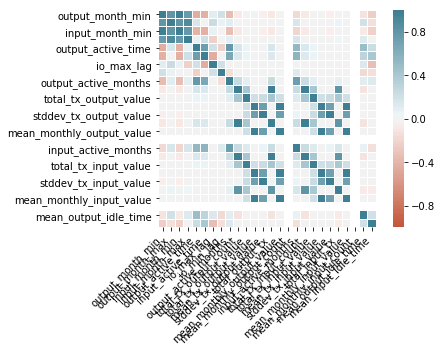

In [0]:
# Correaltional Matrix

data_temp = data.drop(labels=['is_miner','address'], axis=1)
corr = data_temp.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(20,220, n=200),
                square=True, linewidths=0.005)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

plt.savefig('mining_corr.png', bbox_inches='tight', pad_inches=0.0)

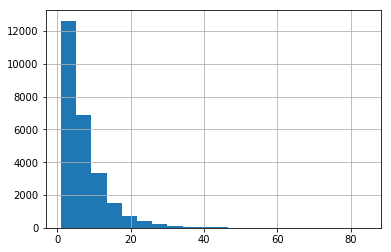

In [0]:
data['input_active_months'].hist(bins=20)

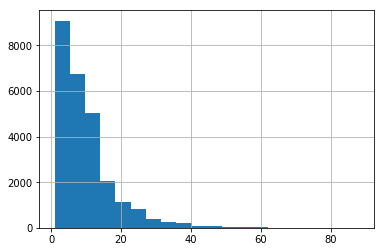

In [0]:
data['output_active_months'].hist(bins=20)

In [0]:
# Training testing split
features = data.drop(labels=['is_miner','address'], axis=1)
#print(data.columns)

#print(features.columns)
#print(features.head())

target = data['is_miner'].values
indices = range(len(features))

#print(target)
#print(indices)

#Train test split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, target, indices,  test_size=0.2)

#print(indices_train)
#print(indices_test)

In [0]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced')
start = time.time()
rf.fit(X_train, y_train)
training_time = int(math.floor(time.time()-start))
print(training_time)

13


In [0]:
y_pred = rf.predict(X_test) 

In [0]:
score = rf.score(X_test, y_test)
print(score)

0.9559869306169517


In [0]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3063  145]
 [  84 1911]]


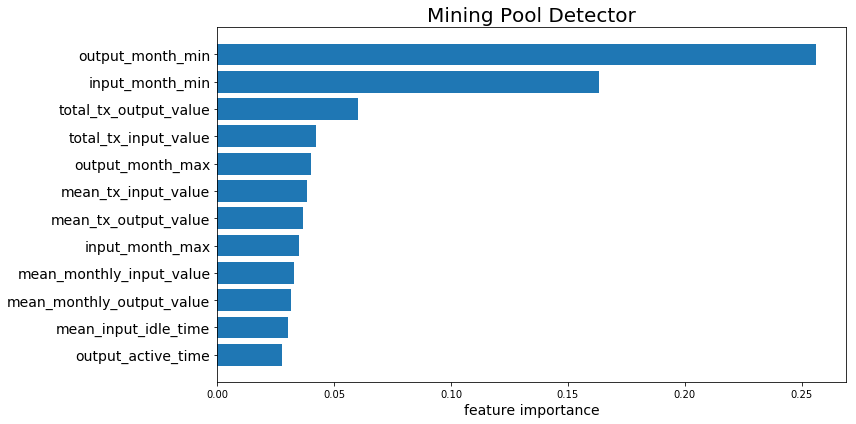

In [0]:
x_pos = np.arange(len(features.columns))
btc_importances = rf.feature_importances_

inds = np.argsort(btc_importances)[::-1]
btc_importances = btc_importances[inds]
cols = features.columns[inds]
bar_width = .8

#how many features to plot?
n_features=12
x_pos = x_pos[:n_features][::-1]
btc_importances = btc_importances[:n_features]

#plot
plt.figure(figsize=(12,6))
plt.barh(x_pos, btc_importances, bar_width, label='BTC model')
plt.yticks(x_pos, cols, rotation=0, fontsize=14)
plt.xlabel('feature importance', fontsize=14)
plt.title('Mining Pool Detector', fontsize=20)
plt.tight_layout()

In [0]:
#data points where model predicts true, but are labelled as false
false_positives = (y_test==False) & (y_pred==True)


In [0]:
#subset to test set data only
data_test = data.iloc[indices_test, :]

print('False Positive addresses')

#subset test set to false positives only
print(data_test.iloc[false_positives].shape)

data_test.iloc[false_positives].head(15)



False Positive addresses
(145, 28)


,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,total_tx_output_value,mean_tx_output_value,stddev_tx_output_value,total_output_tx,mean_monthly_output_value,mean_monthly_output_count,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
12473,False,1DKmTt7ibTRZEahVXNRP5KmuBb3MpXMDaV,1306886400,1356998400,1309478400,1362096000,50112000,52617600,-5097600,-2592000,17,108,7312826569,6.771136e+07,9.594002e+07,108,6.771136e+07,1,2,108,7312826569,6.771136e+07,9.594002e+07,3,6.771136e+07,1,4.731642e+05,2.554095e+07
23091,False,14FNs1gnuK3QGHtMpaqnCXAywxARh7nCZc,1417392000,1556668800,1420070400,1559347200,139276800,139276800,-2678400,-2678400,26,70,717796632,1.025424e+07,2.054594e+06,70,1.025424e+07,1,7,59,607272672,1.029276e+07,2.238687e+06,8,1.029276e+07,1,2.053625e+06,1.983879e+07
14218,False,1DhSZh8RdUQ6QVqbSUQ5FFnMo3ySuAbcxJ,1401580800,1406851200,1404172800,1406851200,5270400,2678400,0,-2592000,3,39,3207807090,8.225146e+07,5.653744e+07,39,8.225146e+07,1,2,39,3207807090,8.225146e+07,5.653744e+07,23,8.225146e+07,1,1.157826e+05,2.062525e+05
16823,False,1H99pT9feDBehYQQEYgQZZEmrXAUN59DQE,1396310400,1477958400,1396310400,1477958400,81648000,81648000,0,0,18,65,5530598154,8.508613e+07,8.289337e+07,65,8.508613e+07,1,18,65,5530598154,8.508613e+07,8.289337e+07,36,8.508613e+07,1,1.283861e+06,2.379290e+06
19483,False,1C3bN2p5qtZCAyfhF8jMxDFLfPdav8QHCV,1385856000,1451606400,1388534400,1430438400,65750400,41904000,21168000,-2678400,9,73,100965039,1.383083e+06,2.144695e+06,73,1.383083e+06,1,2,72,100956451,1.402173e+06,2.153491e+06,2,1.402173e+06,1,9.088635e+05,4.259231e+07
16310,False,12P4ESmTwAmj15gQGjjYZepcoJj6dUP52k,1322697600,1370044800,1322697600,1370044800,47347200,47347200,0,0,19,465,117162653648,2.519627e+08,7.392700e+08,465,2.519627e+08,1,19,465,117162653648,2.519627e+08,7.392700e+08,180,2.519627e+08,1,1.042082e+05,2.661587e+05
19012,False,1LqswABn6eUf7nEBEpoMPJ8nZwRUUk44zj,1385856000,1438387200,1385856000,1464739200,52531200,78883200,-26352000,0,12,281,2958921784,1.052997e+07,1.308759e+07,281,1.052997e+07,1,7,269,2958911773,1.099967e+07,1.318215e+07,12,1.099967e+07,1,1.922285e+05,7.773437e+06
15073,False,19dw7JypvWdiU5DkMETtn6D6TyKRi8ujKy,1367366400,1388534400,1367366400,1388534400,21168000,21168000,0,0,8,73,11008031521,1.507950e+08,2.133856e+08,73,1.507950e+08,1,7,73,11008031521,1.507950e+08,2.133856e+08,48,1.507950e+08,1,3.653259e+05,5.009521e+05
18930,False,1K4CG69WMhvBMDfJ1GumrKnnsFxT58oxw4,1409529600,1446336000,1409529600,1433116800,36806400,23587200,13219200,0,8,38,4376851414,1.151803e+08,1.237392e+08,38,1.151803e+08,1,7,36,4286510159,1.190697e+08,1.255952e+08,15,1.190697e+08,1,1.055509e+06,1.905934e+06
18999,False,1MeUY99HvqSt5gztNHCMnHKTQts2jNUNJt,1364774400,1367366400,1364774400,1506816000,2592000,142041600,-139449600,0,2,33,16278,4.932727e+02,9.314827e+02,33,4.932727e+02,1,2,16,3844,2.402500e+02,2.269507e+02,2,2.402500e+02,1,1.376713e+05,1.407842e+08
